In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df=pd.read_csv('/content/Healthcare_Classification_Dataset.csv')

In [7]:
df.shape

(1500, 16)

In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Billing Amount', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [9]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Billing Amount,Date of Admission,Doctor,Hospital,Insurance Provider,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Tiffany Ramirez,81.0,Female,O-,Diabetes,37490.98336,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,146,Elective,01-12-2022,Aspirin,Normal
1,2,Ruben Burns,35.0,Male,O+,Asthma,47304.06485,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,404,Emergency,15-06-2023,Lipitor,Normal
2,3,Chad Byrd,61.0,Male,B-,Obesity,36874.89700,09-01-2019,Paul Baker,Walton LLC,Medicare,292,Emergency,08-02-2019,Lipitor,NaN
3,4,Antonio Frederick,49.0,Male,B-,Asthma,23303.32209,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,480,Urgent,03-05-2020,Penicillin,Abnormal
4,5,Mrs. Brandy Flowers,51.0,Male,O-,Arthritis,NaN,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,477,Urgent,02-08-2021,Paracetamol,Normal


In [10]:
df=df.drop_duplicates(subset=['ID'])

In [11]:
df.isnull().sum()

,0
ID,0
Name,1
Age,1
Gender,1
Blood Type,1
Medical Condition,4
Billing Amount,7
Date of Admission,1
Doctor,0
Hospital,1


In [12]:
df.dtypes

,0
ID,int64
Name,object
Age,float64
Gender,object
Blood Type,object
Medical Condition,object
Billing Amount,float64
Date of Admission,object
Doctor,object
Hospital,object


In [13]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df
    df= remove_outliers_iqr(df,'Age')
    df= remove_outliers_iqr(df,'Billing Amount')


In [14]:
category_columns=df.select_dtypes(include=['object']).columns
for col in category_columns:
  print(df[col].unique())

['Tiffany Ramirez' 'Ruben Burns' 'Chad Byrd' ... 'Holly Clayton'
 'Carol Byrd' 'Michael Delgado']
['Female' 'Male' nan 'M' 'F']
['O-' 'O+' 'B-' nan 'AB+' 'A+' 'AB-' 'A-' 'B+']
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' nan 'Cancer'
 'arthritis' 'obesity']
['17-11-2022' '01-06-2023' '09-01-2019' ... '05-07-2019' '07-04-2020'
 '30-09-2020']
['Patrick Parker' 'Diane Jackson' 'Paul Baker' ... 'Alexis Hutchinson'
 'David Perry' 'Sandra Porter']
['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Rosales Group' 'Smith-Smith' 'Simmons Group']
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
['Elective' 'Emergency' 'Urgent' nan]
['01-12-2022' '15-06-2023' '08-02-2019' ... '27-10-2020' '11-04-2019'
 '03-10-2020']
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' nan 'Ibuprofen']
['Normal' nan 'Abnormal']


In [15]:
numeric_columns=df.select_dtypes(include=np.number).columns
for col in numeric_columns:
  print(df[col].unique())

[   1    2    3 ... 1497 1498 1499]
[  81.   35.   61.   49.   51.   41.   82.   55.   33. 1000.   45.   23.
   85.   72.   65.  500.   64.   66.  -80.   79.   54.   26.   70.   74.
   56.   37.   78.   83.   30.   19.   46.   48.   34.   84.   47.   60.
   57.   21.   27.   68.   31.   42.   71.   38.   28.   32.   nan   69.
   73.   67.   80.   44.   20.   59.   76.   43.   40.   36.   29.   53.
   77.   24.   75.   25.   62.   52.   39.   50.   22.   63.   58.   18.]
[37490.98336  47304.06485  36874.897    ... 44847.52527   2378.103932
 20086.90405 ]
[146 404 292 480 477 180 161 384 215 310 306 126 444 492 120 315 475 125
 366 238 364 130 293 379 298 392 162 456 197 247 228 137 192 258 219 414
 110 465 469 182 119 388 412 359 186 437 132 271 361 303 317 439 153 438
 380 194 199 301 223 410 205 134 407 188 213 405 358 147 115 436 263 493
 460 356 142 139 482 141 397 347 245 143 108 268 176 462 484 329 335 201
 309 389 217 299 275 181 401 214 267 211 184 140 416 179 289 350 104 220
 4

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender']=df['Gender'].replace ({'M':'Male','F':'Female'})

<ipython-input-16-0aa6853e60a2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [17]:
columns_to_fill=['Age','Billing Amount']
for col in columns_to_fill:
  df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-17-22f6fbf7ae0a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [18]:
columns_to_fill=['Name','Gender', 'Blood Type', 'Medical Condition',
       'Billing Amount', 'Date of Admission','Hospital','Admission Type', 'Discharge Date',
       'Medication']

for col in columns_to_fill:
    df[col]=df[col].fillna(df[col].mode()[0])

In [19]:
df=df.dropna(subset=['Test Results'])

In [20]:
df=df[df['Age']>=0]

In [21]:
df = pd.get_dummies(df, columns=['Gender','Blood Type', 'Medical Condition','Insurance Provider', 'Admission Type', 'Medication'])

In [22]:
df=df.drop(columns=['ID','Name','Doctor','Hospital','Room Number','Discharge Date','Date of Admission'])

In [23]:
df.corr

<bound method DataFrame.corr of        Age  Billing Amount Test Results  Gender_Female  Gender_Male  \
0     81.0    37490.983360       Normal           True        False   
1     35.0    47304.064850       Normal          False         True   
3     49.0    23303.322090     Abnormal          False         True   
4     51.0    25247.355210       Normal          False         True   
5     41.0    22522.363380     Abnormal          False         True   
...    ...             ...          ...            ...          ...   
1494  68.0    25247.355210       Normal           True        False   
1495  43.0    49974.160460     Abnormal          False         True   
1496  37.0    44847.525270       Normal           True        False   
1497  60.0     2378.103932       Normal           True        False   
1498  25.0    20086.904050       Normal           True        False   

      Blood Type_A+  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  \
0             False          False           False           False   
1             False          False           False           False   
3             False          False           False           False   
4             False          False           False           False   
5             False          False           False            True   
...             ...            ...             ...             ...   
1494          False          False           False           False   
1495          False          False           False           False   
1496          False          False            True           False   
1497          False          False            True           False   
1498           True          False           False           False   

      Blood Type_B+  ...  Insurance Provider_Medicare  \
0             False  ...                         True   
1             False  ...                        False   
3             False  ...                         True   
4             False  ...                        False   
5             False  ...                        False   
...             ...  ...                          ...   
1494          False  ...                        False   
1495          False  ...                         True   
1496          False  ...                        False   
1497          False  ...                        False   
1498          False  ...                        False   

      Insurance Provider_UnitedHealthcare  Admission Type_Elective  \
0                                   False                     True   
1                                    True                    False   
3                                   False                    False   
4                                    True                    False   
5                                   False                    False   
...                                   ...                      ...   
1494                                False                    False   
1495                                False                    False   
1496                                False                    False   
1497                                False                    False   
1498                                False                     True   

      Admission Type_Emergency  Admission Type_Urgent  Medication_Aspirin  \
0                        False                  False                True   
1                         True                  False               False   
3                        False                   True               False   
4                        False                   True               False   
5                        False                   True                True   
...                        ...                    ...                 ...   
1494                      True                  False               False   
1495                      True                  False               False   
1496                     False                   True  

In [24]:
x = df.drop(['Test Results', 'Admission Type_Elective', 'Insurance Provider_Medicare'], axis=1)
y = df['Test Results']

In [25]:
df['Test Results'].value_counts()

,count
Test Results,
Normal,971
Abnormal,524


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
y_train=pd.Series(y_train)

In [29]:
smote=SMOTE(random_state=42)

In [30]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [31]:
print('After Oversampling for X_train:')
print(y_train_smote.value_counts())

After Oversampling for X_train:
Test Results
Normal      778
Abnormal    778
Name: count, dtype: int64


In [32]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

results = []
names = []

for name, model in models:
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = model.score(X_test, y_test)  # Compute accuracy

    results.append(accuracy)
    names.append(name)

    print(f"{name}: Accuracy: {accuracy:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy: 0.542
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Abnormal       0.34      0.32      0.33       106
      Normal       0.64      0.66      0.65       193

    accuracy                           0.54       299
   macro avg       0.49      0.49      0.49       299
weighted avg       0.53      0.54      0.54       299


Decision Tree: Accuracy: 0.522
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Abnormal       0.33      0.35      0.34       106
      Normal       0.63      0.62      0.62       193

    accuracy                           0.52       299
   macro avg       0.48      0.48      0.48       299
weighted avg       0.53      0.52      0.52       299


Random Forest: Accuracy: 0.545
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Abnormal       0.26      0.15      0.19       106
      N

In [54]:
import seaborn as sns
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

results = []
resultsf1 = []
names = []

for name, model in models:
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = model.score(X_test, y_test)  # Compute accuracy

    results.append(accuracy)
    names.append(name)

    f1 = f1_score(y_test, y_pred, average='weighted') # Calculate F1-score

    resultsf1.append(f1)

    print(f"{name}: Accuracy: {accuracy:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy: 0.542
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Abnormal       0.34      0.32      0.33       106
      Normal       0.64      0.66      0.65       193

    accuracy                           0.54       299
   macro avg       0.49      0.49      0.49       299
weighted avg       0.53      0.54      0.54       299


Decision Tree: Accuracy: 0.505
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Abnormal       0.32      0.34      0.33       106
      Normal       0.62      0.60      0.61       193

    accuracy                           0.51       299
   macro avg       0.47      0.47      0.47       299
weighted avg       0.51      0.51      0.51       299


Random Forest: Accuracy: 0.569
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Abnormal       0.32      0.20      0.25       106
      N

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


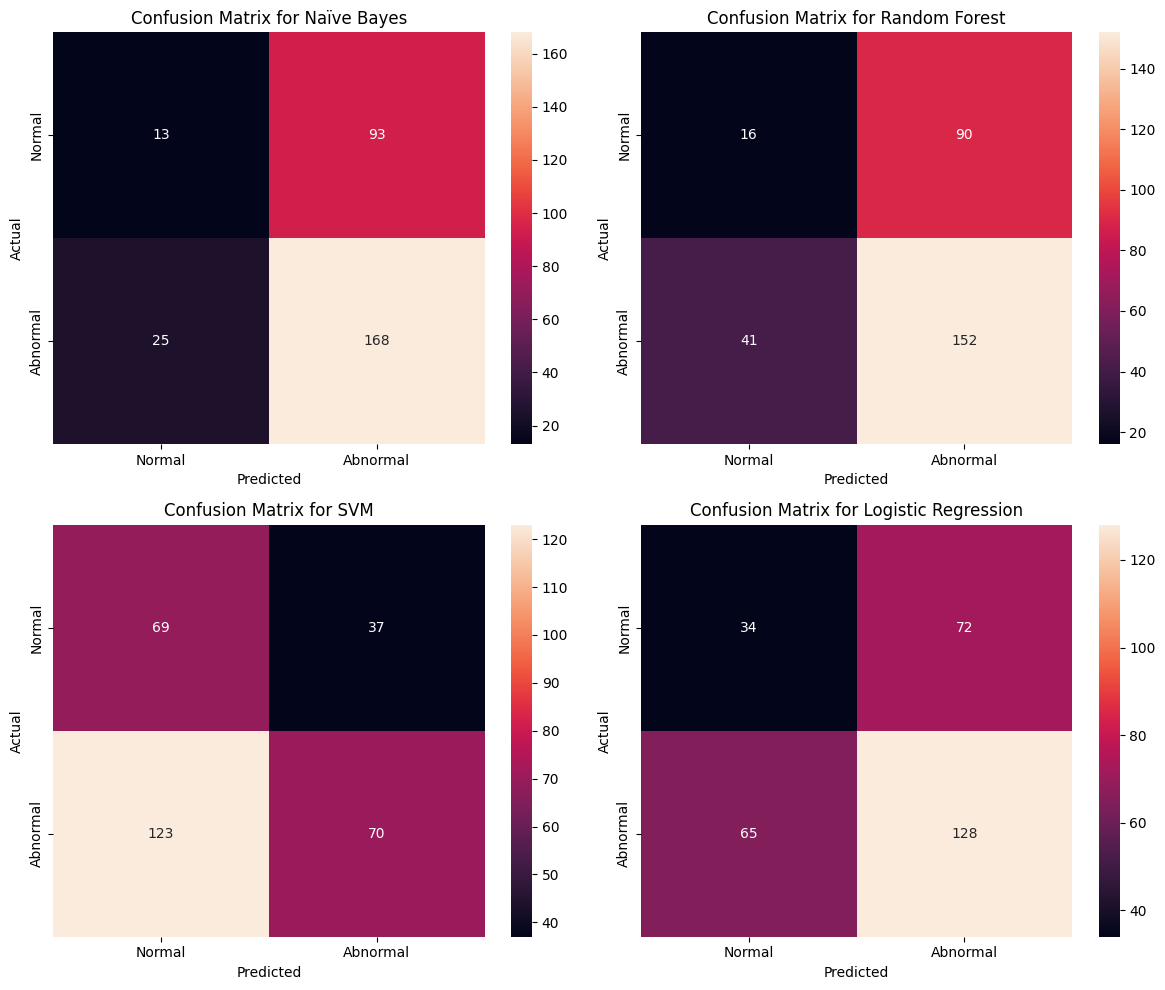

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Assuming you have trained the models and assigned them to these variables:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_smote, y_train_smote)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_smote, y_train_smote)

svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_smote, y_train_smote)

# Dictionary of models
models = {
    "Naïve Bayes": naive_bayes_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_regression_model
}

plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)  # Predict using the model
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    plt.subplot(2, 2, i)  # Adjust grid size based on the number of models
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])

    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [51]:
results

[0.5418060200668896,
 0.5083612040133779,
 0.5484949832775919,
 0.46488294314381273,
 0.6053511705685619]

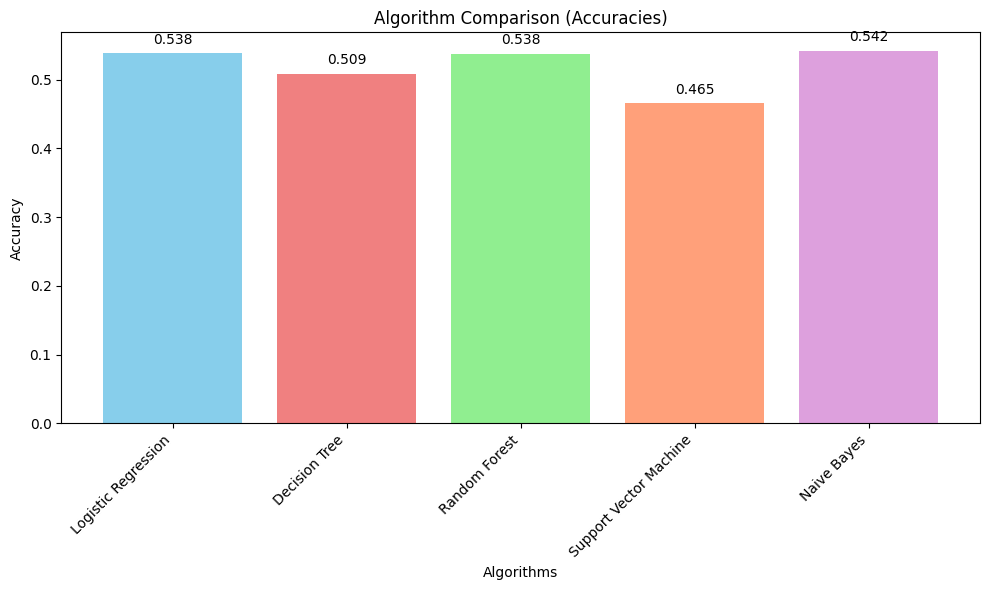

In [55]:
# prompt: #bar plot for algorithm comparison(accuracies of models) with labelling accuracy values

import matplotlib.pyplot as plt

# Sample accuracy data (replace with your actual results)
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']
accuracies = resultsf1  # Use the 'results' list from your previous code

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'plum'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison (Accuracies)")

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
